In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [4]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
del df['Serial No.']
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Here we have the level of measurement for our data variables:

- GRE Score: Interval
- TOEFL Score: Interval
- University Rating: Ordinal
- SOP: Ordinal
- LOR: Ordinal
- CGPA: Interval
- Research: Nominal (binary)
- Chance of Admit: Ratio

According to 
[this link](https://www.researchgate.net/post/Is_Pearsons_Correlation_coefficient_appropriate_for_non-normal_data), because
we have a dataset with each record containing all levels of measurement, it would not be appropriate to find the Pearson's correlation matrix of the dataset, because we have ordinal and nominal variables. Instead, we will find the Spearman's correlation matrix of the dataset excluding the nominal variable "Research". We can make a second correlation matrix using Pearson's coefficient for the the variables among the interval/ratio variables.

In [5]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [33]:
df_interval = df[['GRE Score', 'TOEFL Score', 'CGPA','Chance of Admit ']]
df_ordinal = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']]

Below are the qq-plots for the interval/ratio variables of our dataset. ((((((I'd like to be able to plot the four of them into one graph. ))))))

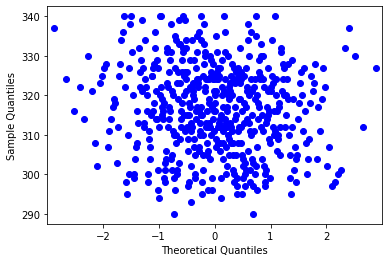

In [28]:
fig = sm.qqplot(df_interval[['GRE Score']].values)

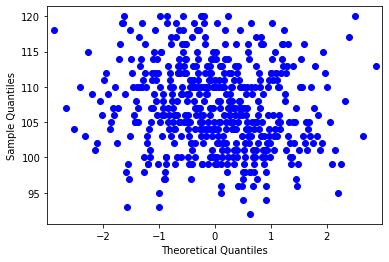

In [29]:
fig1 = sm.qqplot(df_interval[['TOEFL Score']].values)

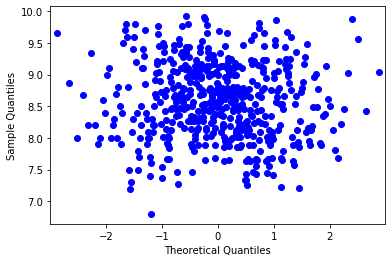

In [30]:
fig2 = sm.qqplot(df_interval[['CGPA']].values)

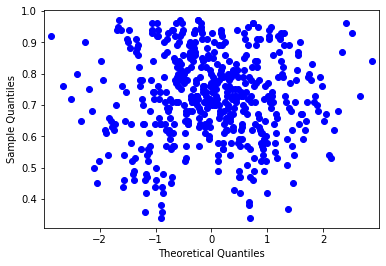

In [31]:
fig3 = sm.qqplot(df_interval[['Chance of Admit ']].values)

It's safe to say that none of these variables come from a normal distribution, because none of these qqplots show a even a hint of linearity.

In [32]:
rho_i = np.corrcoef(df_interval.values, rowvar = False)
print(rho_i)

[[1.         0.8272004  0.82587795 0.81035064]
 [0.8272004  1.         0.81057354 0.79222761]
 [0.82587795 0.81057354 1.         0.88241257]
 [0.81035064 0.79222761 0.88241257 1.        ]]


In [7]:
rho_o, p_o = stats.spearmanr(df_ordinal.values)
print(rho_o.round(7))

[[1.        0.8238534 0.6434227 0.6206885 0.5143515 0.8292507 0.8222012]
 [0.8238534 1.        0.645533  0.6447145 0.5234344 0.8094847 0.7936342]
 [0.6434227 0.645533  1.        0.729399  0.6023185 0.7033331 0.7037425]
 [0.6206885 0.6447145 0.729399  1.        0.6626529 0.717384  0.7027994]
 [0.5143515 0.5234344 0.6023185 0.6626529 1.        0.6395633 0.6436271]
 [0.8292507 0.8094847 0.7033331 0.717384  0.6395633 1.        0.8887857]
 [0.8222012 0.7936342 0.7037425 0.7027994 0.6436271 0.8887857 1.       ]]


Here we're going to take the eigenvalues of our ordinal rho matrix, because we are interested in doing a principal components analysis. 

In [61]:
vals, vecs = np.linalg.eig(rho_o)

print("The eigenvalues of our spearman rho matrix:")
print(vals.round(6), "\n")

print("(i,j): where j is the sum of the first i eigenvalues")

print([(i, round(sum(vals[0:i]) / 7, 6)) for i in range(1, len(vals) + 1)])

The eigenvalues of our spearman rho matrix:
[5.211044 0.65381  0.39104  0.109957 0.161739 0.263408 0.209003] 

(i,j): where j is the sum of the first i eigenvalues
[(1, 0.744435), (2, 0.837836), (3, 0.893699), (4, 0.909407), (5, 0.932513), (6, 0.970142), (7, 1.0)]


Looking at the above list of tuples, we see that .837836 of the variation found in this data can be explained by two principal components.